# Analisando os Dados

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_excel('D:\download\Dados_frexco.xlsx')
df.head()

,Data,Vendas
0,2022-12-06,870
1,2022-12-07,868
2,2022-12-08,1189
3,2022-12-09,742
4,2022-12-10,317


In [12]:
df.Data = pd.to_datetime(df.Data)
df.set_index('Data', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46 entries, 2022-12-06 to 2023-01-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Vendas  46 non-null     int64
dtypes: int64(1)
memory usage: 736.0 bytes


<AxesSubplot:xlabel='Data'>

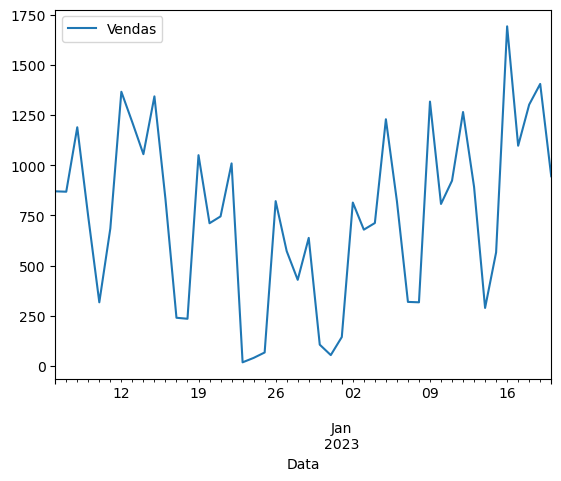

In [13]:
df.plot()

<AxesSubplot:xlabel='Data'>

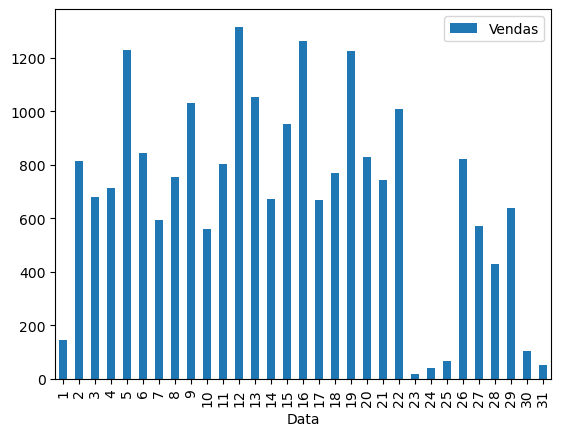

In [14]:
df.groupby(df.index.day).mean().plot(kind='bar')

<AxesSubplot:xlabel='Data'>

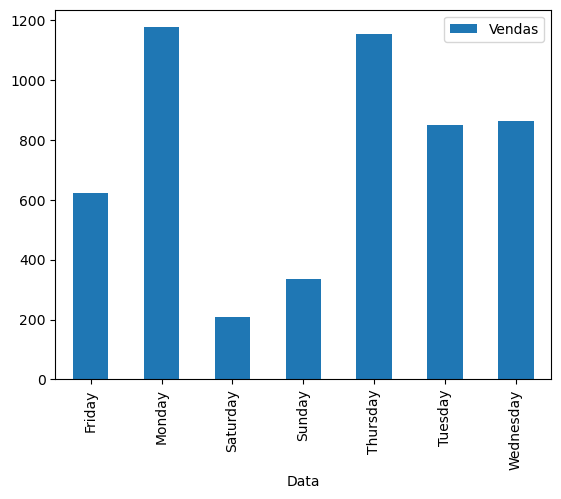

In [15]:
df.groupby(df.index.day_name()).mean().plot(kind='bar')

In [16]:
df

,Vendas
Data,
2022-12-06,870
2022-12-07,868
2022-12-08,1189
2022-12-09,742
2022-12-10,317
2022-12-11,685
2022-12-12,1366
2022-12-13,1213
2022-12-14,1055


Os dados apresentam uma diferença consideravel nos valores de vendas. primeiramente vou normalizar os dados e se preciso retirar os outliers.

# Manipulando os Dados

In [17]:
from sklearn.preprocessing import MinMaxScaler
serie = df.Vendas
serie_res = serie.array.reshape(-1, 1)
scaler = MinMaxScaler()
scaler.fit(serie_res)
dados_normalizados = scaler.transform(serie_res)
print(dados_normalizados)

[[0.50896057]
 [0.50776583]
 [0.6995221 ]
 [0.43249701]
 [0.1786141 ]
 [0.39844683]
 [0.80525687]
 [0.71385902]
 [0.61947431]
 [0.79151732]
 [0.48626045]
 [0.13261649]
 [0.12962963]
 [0.61648746]
 [0.41397849]
 [0.43428913]
 [0.59199522]
 [0.        ]
 [0.01314217]
 [0.02927121]
 [0.47968937]
 [0.33094385]
 [0.24551971]
 [0.37037037]
 [0.0525687 ]
 [0.02150538]
 [0.07526882]
 [0.47550777]
 [0.3948626 ]
 [0.41457587]
 [0.72341697]
 [0.47968937]
 [0.17980884]
 [0.1786141 ]
 [0.77598566]
 [0.47132616]
 [0.54062127]
 [0.74492234]
 [0.52210275]
 [0.16188769]
 [0.32735962]
 [1.        ]
 [0.64456392]
 [0.76702509]
 [0.82855436]
 [0.55376344]]


In [18]:
#criando df com os dados normalizados
indices = df.index
vendas = dados_normalizados
df_new = pd.DataFrame(vendas, columns=['sales'], index=indices)
df_new.head()

,sales
Data,
2022-12-06,0.508961
2022-12-07,0.507766
2022-12-08,0.699522
2022-12-09,0.432497
2022-12-10,0.178614


# Aplicando o Modelo

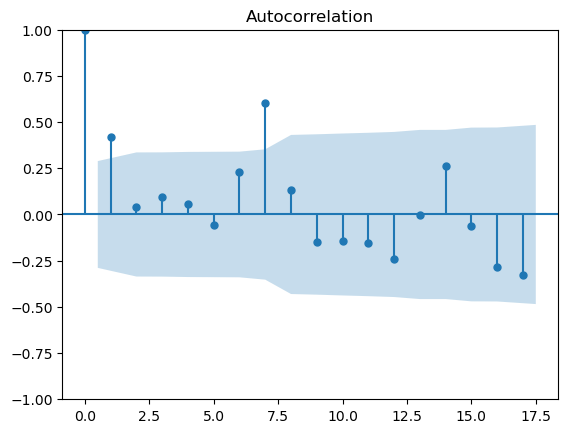

In [33]:
plot_acf(df_new.sales)
plt.show()

C:\Users\ezequ\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


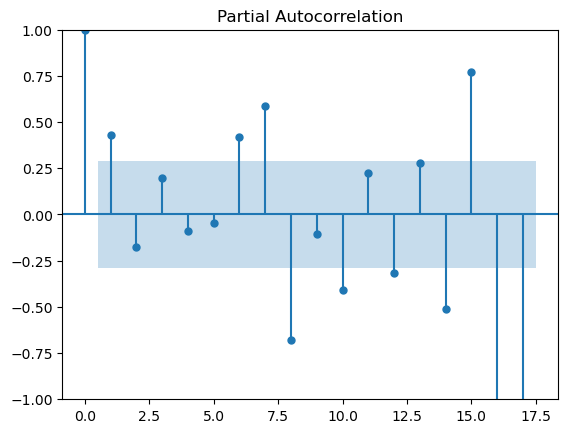

In [35]:
plot_pacf(df_new.sales)
plt.show()

In [19]:
#separando treino e teste

train_size = int(len(df_new.sales)*2/3)
train_set = df_new.sales[:train_size]
test_set = df_new.sales[train_size:]

In [20]:
#treinando o modelo

arima = ARIMA(train_set, freq='D' ,order = (8,0,6)).fit()
print("Erro quadrático médio: ", (arima.resid**2).mean())


C:\Users\ezequ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ezequ\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ezequ\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Erro quadrático médio:  0.01758954945724558


C:\Users\ezequ\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


os parametros escolhidos,Depois de alguns testes, sao (8,0,6). O que equivale como um ARMA(8,6)

count    30.000000
mean      0.017590
std       0.030346
min       0.000002
25%       0.001904
50%       0.005399
75%       0.020421
max       0.139525
dtype: float64


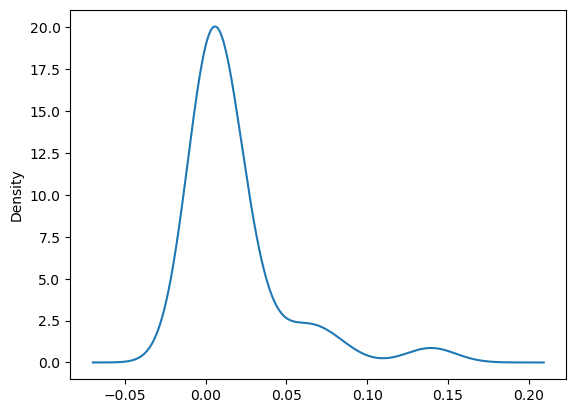

In [21]:
r = arima.resid**2
r.plot(kind='kde')
print(r.describe())

Os erros seguem uma distribuição normal próxima da centralidade zero.

In [73]:
# testando o modelo

from sklearn.metrics import mean_squared_error
forecast = arima.forecast(steps=len(test_set))
mse = mean_squared_error(test_set, forecast)
print("Erro quadrático médio: ", mse)

Erro quadrático médio:  0.060329758433824224


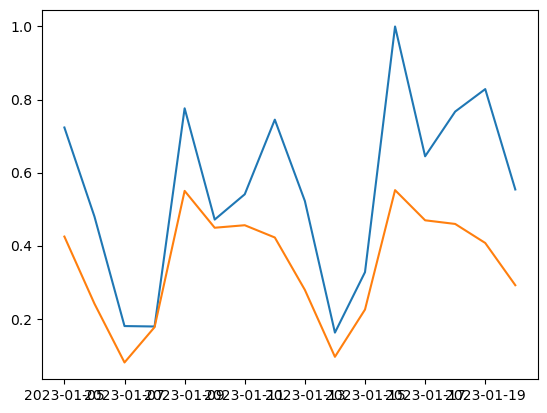

In [30]:
# comparando o modelo com os dados reais

plt.figure()
plt.plot(test_set)
plt.plot(forecast)
plt.show()

O modelo conseguiu prever alguns momentos de pico mas precisa de ajustes.

C:\Users\ezequ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ezequ\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ezequ\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ezequ\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


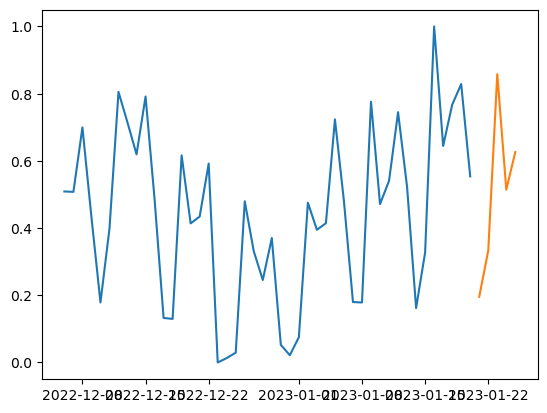

In [32]:
# treinando com o conjunto inteiro e prevendo os proximos 5 dias

model = ARIMA(df_new, freq='D' ,order = (8,0,6)).fit()
previ = model.predict(start = '2023 - 01- 21' , end = '2023 - 01- 25')
plt.figure()
plt.plot(df_new)
plt.plot(previ)
plt.show()



Nesse gráfico fica visível que o modelo capturou uma tendência de 2 picos e uma queda brusca. A previsão mostra o primeiro pico e o inicio do segundo pico.

# Conclusões

O modelo aparenta ser razoavel nas previsões, porem algumas melhorias são identificaveis 

    aumentar o conjunto de analise
    retirar os outliers
    utilizar outro modelo que capture tendência de sazonalidades como o SARIMA

